# Hospital Data Visualization 4

## Importing required libraries

In [1]:
# Library for modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

# Library to see the training models
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import warnings

warnings.filterwarnings('ignore')
# look at the first ten thousand bytes to guess the character encoding
with open('04.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


## Reading the Data

In [2]:
df_lab=pd.read_csv('04.csv',sep=';',encoding='ISO-8859-1') 

In [3]:
df_lab.head(15)

,PATIENT ID,PETICION_LABORATORIO/LAB_NUMBER,FECHA_PETICION/LAB_DATE,HORA_PETICION/TIME_LAB,DETERMINACION/ITEM_LAB,RESULTADO/VAL_RESULT,UNIDADES/UD_RESULT,VALORES_REFERENCIA/REF_VALUES
0,1,I-1,2020-04-08,0:00,GOT -- GOT (AST),215,U/L,<41
1,1,I-1,2020-04-08,0:00,LIN% -- Linfocitos %,3,%,(20.0 - 50.0)
2,1,I-1,2020-04-08,0:00,MONO -- Monocitos,0.12,x10e3/µL,(0.1 - 0.8)
3,1,I-2,2020-04-07,0:00,BAS -- Basófilos,0.02,x10e3/µL,(0.0 - 0.3)
4,1,I-2,2020-04-07,0:00,BT -- BILIRRUBINA TOTAL ...,0.43,mg/dL,<1.2
5,1,I-2,2020-04-07,0:00,GGT -- GGT (GAMMA GLUTAMIL TRANSPEPTIDASA),23,U/L,<60
6,1,I-2,2020-04-07,0:00,HCTO -- Hematocrito,40.4,%,(40.0 - 52.0)
7,1,I-2,2020-04-07,0:00,HGB -- Hemoglobina,13.5,g/dL,(14.0 - 17.5)
8,1,I-2,2020-04-07,0:00,VCM -- Volumen Corpuscular Medio,82.6,fL,(80.0 - 99.0)
9,1,I-2,2020-04-07,0:00,VIHAC -- VIH AC,Negativo (0.15),IC,Negativo: <0.9^Zona límite: 0.9-1^Reactivo: >1


## Checking the Data

In [5]:
df_lab.isna().sum()

PATIENT ID                             0
PETICION_LABORATORIO/LAB_NUMBER        0
FECHA_PETICION/LAB_DATE                0
HORA_PETICION/TIME_LAB                 0
DETERMINACION/ITEM_LAB                 0
RESULTADO/VAL_RESULT                   9
UNIDADES/UD_RESULT                 22395
VALORES_REFERENCIA/REF_VALUES       9241
dtype: int64

In [6]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396055 entries, 0 to 396054
Data columns (total 8 columns):
PATIENT ID                         396055 non-null int64
PETICION_LABORATORIO/LAB_NUMBER    396055 non-null object
FECHA_PETICION/LAB_DATE            396055 non-null object
HORA_PETICION/TIME_LAB             396055 non-null object
DETERMINACION/ITEM_LAB             396055 non-null object
RESULTADO/VAL_RESULT               396046 non-null object
UNIDADES/UD_RESULT                 373660 non-null object
VALORES_REFERENCIA/REF_VALUES      386814 non-null object
dtypes: int64(1), object(7)
memory usage: 24.2+ MB


In [7]:
df_lab.shape

(396055, 8)

## Feature Exploration

In [8]:
#Creamos copia para no destrozar los datos originales
result = df_lab.copy()

In [9]:
#Vemos que hay inconsistencia de datos sobre 'PETICION_LABORATORIO/LAB_NUMBER','UNIDADES/UD_RESULT'
result.drop(['PETICION_LABORATORIO/LAB_NUMBER','UNIDADES/UD_RESULT'],axis=1, inplace=True)

In [10]:
#separamos tabla sin referencias para posteriormente estudiarlo con un especialista medico
result_sref = result.loc[result['VALORES_REFERENCIA/REF_VALUES'].isnull(), :]
result_sref.to_csv("4_sref.csv",sep=',')

In [11]:
result = result.loc[result['VALORES_REFERENCIA/REF_VALUES'].notnull(), :]

In [12]:
result.drop(['VALORES_REFERENCIA/REF_VALUES'],axis=1, inplace=True)

In [13]:
result.isna().sum()

PATIENT ID                 0
FECHA_PETICION/LAB_DATE    0
HORA_PETICION/TIME_LAB     0
DETERMINACION/ITEM_LAB     0
RESULTADO/VAL_RESULT       0
dtype: int64

In [14]:
result['RESULTADO/VAL_RESULT'].fillna(0, inplace=True)

In [15]:
# Decide which categorical variables you want to use in model
for col_name in result.columns:
    if result[col_name].dtypes == 'object' :
        unique_cat = len(result[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(
                col_name=col_name, unique_cat=unique_cat))

Feature 'FECHA_PETICION/LAB_DATE' has 111 unique categories
Feature 'HORA_PETICION/TIME_LAB' has 905 unique categories
Feature 'DETERMINACION/ITEM_LAB' has 290 unique categories
Feature 'RESULTADO/VAL_RESULT' has 17427 unique categories


In [16]:
#Tratamos las variables categoricas unicas
result['DETERMINACION/ITEM_LAB'] = result['DETERMINACION/ITEM_LAB'].astype('category')
farm=dict( enumerate(result['DETERMINACION/ITEM_LAB'].cat.categories ) )
result['DETERMINACION/ITEM_LAB'] = result['DETERMINACION/ITEM_LAB'].cat.codes
farm

{0: 'ACDNAN -- Ac. ANTI nDNA',
 1: 'ACETRECEP -- Ac. ANTI RECEPTOR ACETILCOLINA',
 2: 'ACLCR -- ACLARAMIENTO CREATININA',
 3: 'ACTH -- ACTH (HORMONA ADRENOCORTICOTROPA)',
 4: 'ADAL -- ADENOSIN DESAMINASA (ADA) EN LCR',
 5: 'ADW -- Coeficiente de anisocitosis',
 6: 'AFP -- ALFA FETOPROTEINA',
 7: 'ALB -- ALBUMINA',
 8: 'ALB-CREA -- COCIENTE ALBUMINA-CREATININA ORINA',
 9: 'ALUP -- ANTICOAGULANTE LUPICO',
 10: 'AMA -- AMA (AC. ANTIMITOCONDRIALES)',
 11: 'AMI -- AMILASA',
 12: 'AMIKAV -- AMIKACINA VALLE',
 13: 'AMIL -- AMILASA LIQUIDO',
 14: 'AMO -- AMONIACO',
 15: 'ANA -- ANA (AC. ANTINUCLEARES)',
 16: 'ANCA -- ANCA (AC. ANTINEUTROFILOS)',
 17: 'ANTIPLAQD -- ANTICUERPOS ANTIPLAQUETARIOS DIRECTOS',
 18: 'ANTIPLAQIN -- ANTICUERPOS ANTIPLAQUETARIOS INDIRECTOS',
 19: 'ANTI_CCP -- Ac. ANTI CCP',
 20: 'AP -- ACTIVIDAD DE PROTROMBINA',
 21: 'APTT -- TIEMPO DE CEFALINA (APTT)',
 22: 'AU -- ACIDO URICO',
 23: 'AVISADOPAR -- Parám. críticos',
 24: 'B2GLICOG -- Ac. IgG ANTI BETA-2-GLICOPROTEINA',
 

In [17]:
#HGB -- Hemoglobina

In [18]:
#Leemos el csv al que mapeariamos para establecer relacion entre PACIENTE ID y su resultado DIAG ING/INPAT
#Variable a predecir
df=pd.read_csv('01.csv',encoding='ISO-8859-1',sep=';',parse_dates=True,dayfirst=True)
result1 = result

In [19]:
rename_dict = df.set_index('PATIENT ID').to_dict()['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']

In [20]:
result1['PATIENT ID'] = result1['PATIENT ID'].replace(rename_dict)
result1 = result1[result1['PATIENT ID'].notnull()]

In [21]:
result1['PATIENT ID'] = result1['PATIENT ID'].astype('category')
test=dict( enumerate(result1['PATIENT ID'].cat.categories ) )
result1['PATIENT ID'] = result1['PATIENT ID'].cat.codes
result1.rename(columns={'PATIENT ID':'MOTIVO_ALTA/DESTINY_DISCHARGE_ING'}, inplace=True)
test

{0: 509,
 1: 'Alta Voluntaria',
 2: 'Domicilio',
 3: 'Fallecimiento',
 4: 'Traslado a un Centro Sociosanitario',
 5: 'Traslado al Hospital'}

Nos encontramos con una inconsistencia de datos, chequeamos el csv01 y vemos que no existe un paciente con ID:509 por lo que eliminamos dicho registro.

In [22]:
result = result[(result[['PATIENT ID']] != 509).all(axis=1)]

In [23]:
result['PATIENT ID'] = result['PATIENT ID'].replace(rename_dict)
result = result[result['PATIENT ID'].notnull()]

In [24]:
result['PATIENT ID'] = result['PATIENT ID'].astype('category')
test=dict( enumerate(result['PATIENT ID'].cat.categories ) )
result['PATIENT ID'] = result['PATIENT ID'].cat.codes
result.rename(columns={'PATIENT ID':'MOTIVO_ALTA/DESTINY_DISCHARGE_ING'}, inplace=True)
test

{0: 'Alta Voluntaria',
 1: 'Domicilio',
 2: 'Fallecimiento',
 3: 'Traslado a un Centro Sociosanitario',
 4: 'Traslado al Hospital'}

In [25]:
(result['MOTIVO_ALTA/DESTINY_DISCHARGE_ING'].values < 0).any()

False

In [26]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303864 entries, 0 to 396054
Data columns (total 5 columns):
MOTIVO_ALTA/DESTINY_DISCHARGE_ING    303864 non-null int8
FECHA_PETICION/LAB_DATE              303864 non-null object
HORA_PETICION/TIME_LAB               303864 non-null object
DETERMINACION/ITEM_LAB               303864 non-null int16
RESULTADO/VAL_RESULT                 303864 non-null object
dtypes: int16(1), int8(1), object(3)
memory usage: 10.1+ MB


## Exploratory Data analysis

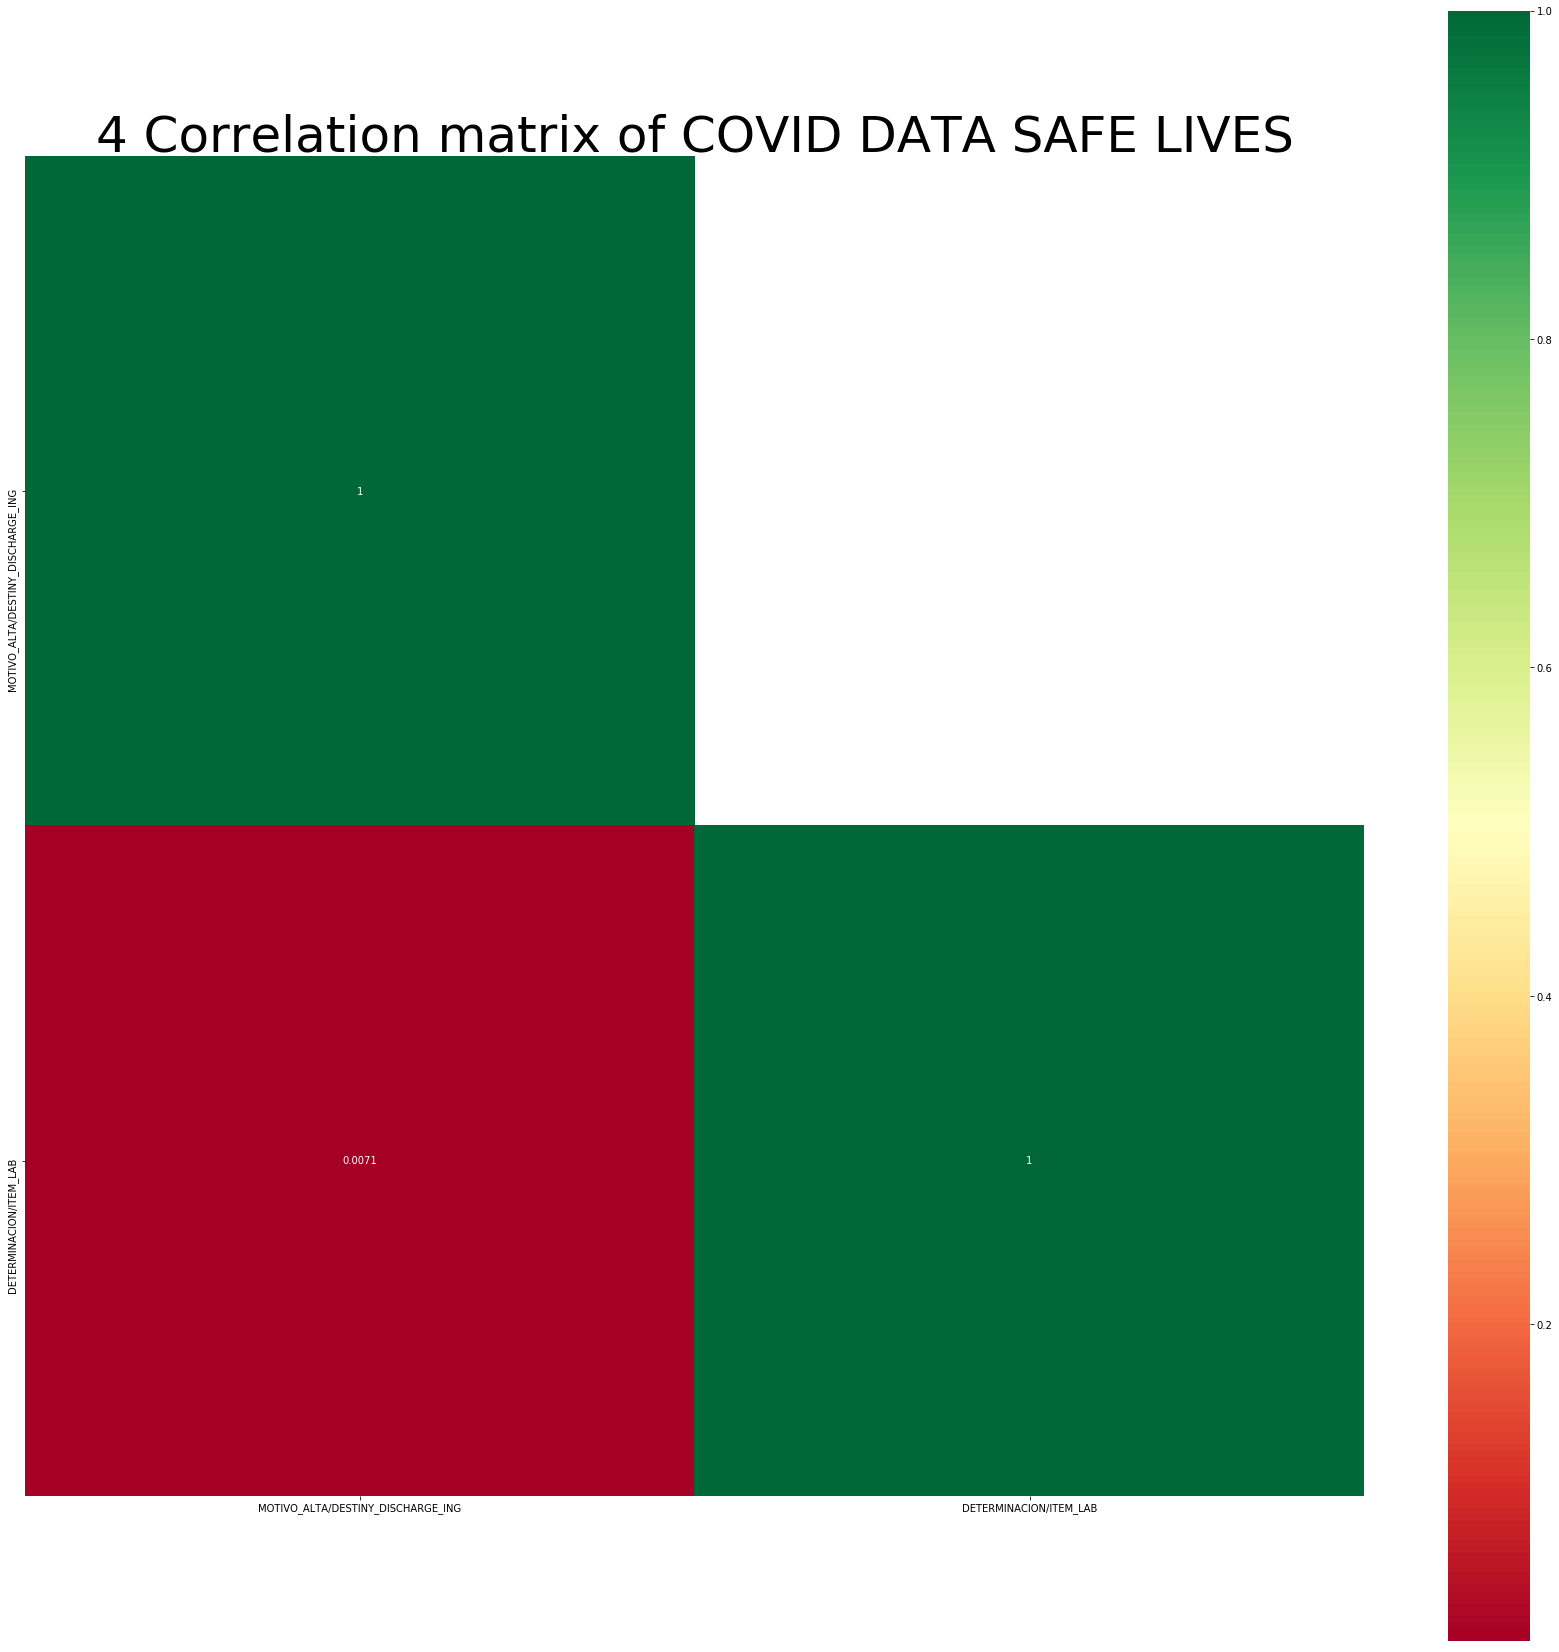

In [27]:
plt.figure(figsize=(30,30))
sns.heatmap(result.corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(result.corr(), k=1))
plt.title("4 Correlation matrix of COVID DATA SAFE LIVES",fontsize=50)
plt.show()

As expected there is no relationship between these variables.

### General

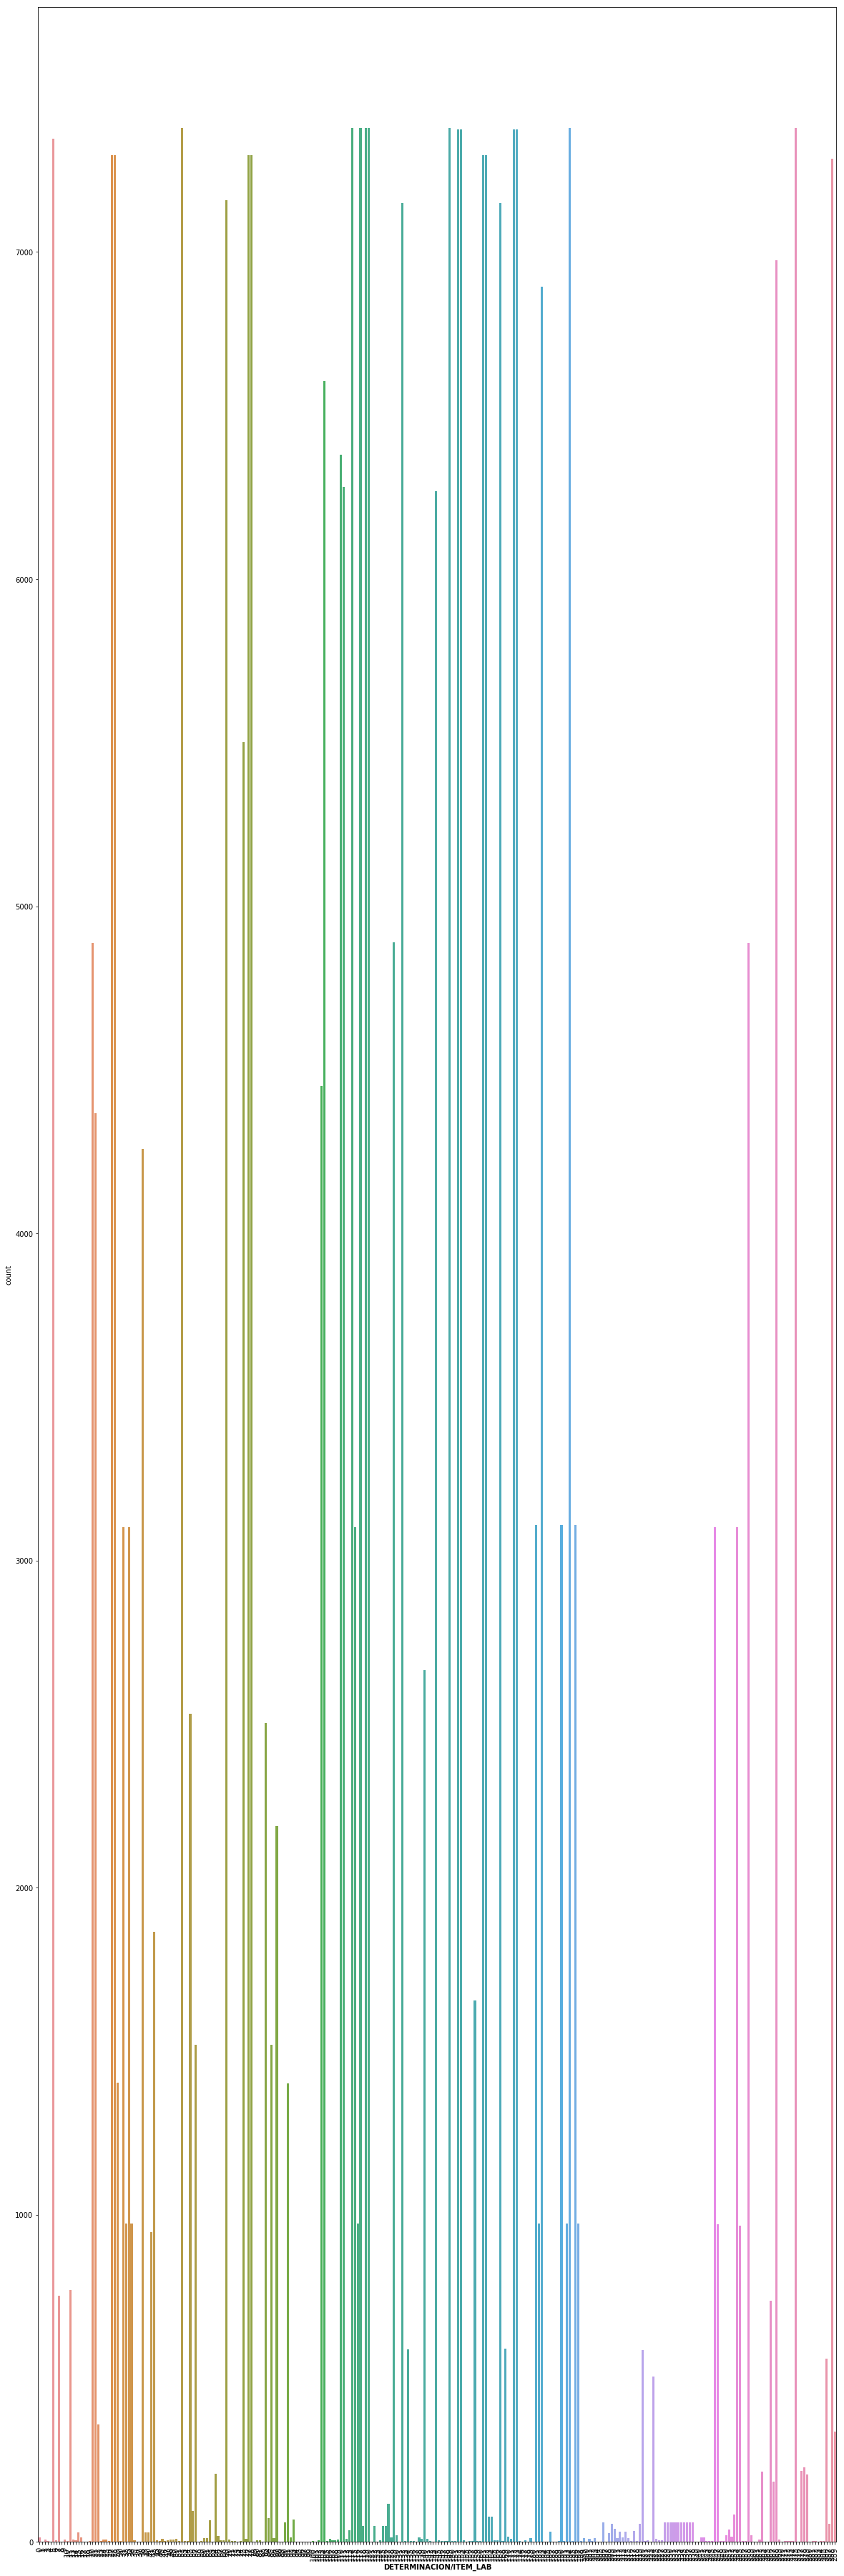

In [28]:
col_numeric = list(result.select_dtypes(include = "int16"))
# visualizing the other categorical variables
plt.figure(figsize=(20,300))
for i,col in enumerate(col_numeric, start=1):
    plt.subplot(4,1,i)
    plt.xticks(rotation=90)
    sns.countplot(result[col])
    plt.xlabel(col, fontsize=10,fontweight="bold")
plt.show()

Hay demasiados valores de entradas por lo que no podemos visualizarlo gráficamente.

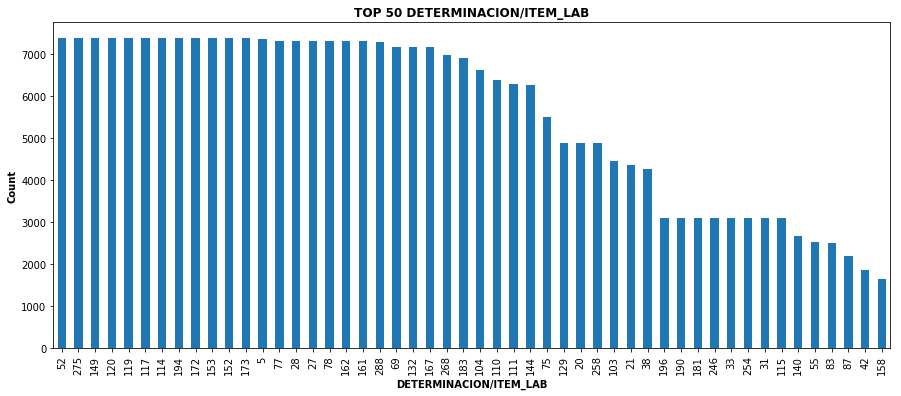

In [29]:
# visualizing the DETERMINACION/ITEM_LAB
plt.figure(figsize=(15,6))
top50 = result["DETERMINACION/ITEM_LAB"].value_counts().sort_values(ascending=False).head(50).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("DETERMINACION/ITEM_LAB", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.title("TOP 50 DETERMINACION/ITEM_LAB", fontweight="bold")
plt.show()

In [30]:
for col_name in result.columns:
    print(result[col_name].value_counts(normalize=True).head(10) * 100)

1    74.833807
2    21.864387
4     2.539623
3     0.686491
0     0.075692
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
2020-03-30    4.653398
2020-03-26    4.487205
2020-03-27    4.380907
2020-04-01    4.347998
2020-03-24    4.311797
2020-03-31    4.283824
2020-03-25    4.282508
2020-03-23    3.933668
2020-03-29    3.755628
2020-04-02    3.692112
Name: FECHA_PETICION/LAB_DATE, dtype: float64
0:00     82.195653
17:39     0.073059
18:22     0.072401
12:23     0.070755
17:17     0.068781
16:04     0.067464
20:04     0.067135
22:26     0.066806
12:44     0.065161
10:47     0.064832
Name: HORA_PETICION/TIME_LAB, dtype: float64
52     2.428389
275    2.428389
149    2.428389
120    2.428389
119    2.428389
117    2.428389
114    2.428389
194    2.428389
172    2.426744
153    2.426744
Name: DETERMINACION/ITEM_LAB, dtype: float64
0       2.257589
0.01    1.076139
0.2     0.797396
0.1     0.703604
0.02    0.661809
0.3     0.578219
0.03    0.420912
0.4     0.420254
0.5     0.356739


FECHA_PETICION/LAB_DATE: mayormente al finales de marzo y principios de abril
    
HORA_PETICION/TIME_LAB: 84,79% a las 0:00 suponemos que no sabrían la hora exacta por lo que pusieron como general.

DETERMINACION/ITEM_LAB: N

RESULTADO/VAL_RESULT: varios sin resultados.

In [31]:
s_filter = result['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']<2
e_filter =(result['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']==3 )+ (result['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']==4)
f_filter = result['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']==2
#204: 'LEGIORI -- AG. LEGIONELA PNEUMOPHILA EN ORINA',
#240: 'NEUMOORI -- AG NEUMOCOCO EN ORINA',

### Sanados

In [32]:
for col_name in result[s_filter].columns:
    print(result[s_filter][col_name].value_counts(normalize=True).head(20) * 100)

1    99.898956
0     0.101044
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
2020-03-30    5.017068
2020-03-26    4.709542
2020-04-01    4.664731
2020-03-24    4.494713
2020-03-31    4.486366
2020-03-27    4.302729
2020-03-25    4.256160
2020-03-29    4.149405
2020-04-02    3.982902
2020-03-23    3.967086
2020-03-28    3.873949
2020-04-03    3.730291
2020-04-06    3.679329
2020-04-04    3.266366
2020-03-22    3.198271
2020-03-20    2.808152
2020-03-19    2.591566
2020-04-07    2.561692
2020-03-21    2.558617
2020-04-09    2.547194
Name: FECHA_PETICION/LAB_DATE, dtype: float64
0:00     81.246183
14:07     0.081275
13:09     0.077321
17:39     0.076442
17:17     0.075564
12:24     0.071610
16:04     0.071170
16:24     0.069852
10:47     0.068534
18:06     0.068534
16:50     0.068534
15:32     0.067656
11:41     0.066338
18:19     0.066338
13:06     0.065898
13:01     0.064141
13:23     0.063702
20:38     0.062823
12:39     0.062384
17:05     0.061066
Name: HORA_PETICION/TIME_LAB

FECHA_PETICION/LAB_DATE: N
    
HORA_PETICION/TIME_LAB: 85.01% a las 0:00 y las otras horas interpretamos cuando se recopila la solicitud.

DETERMINACION/ITEM_LAB: 'VPM -- Volumen plaquetar medio'(120), 'PLAQ -- Recuento de plaquetas'(117), 'CHCM -- Conc. Hemoglobina Corpuscular Media'(275), 'HCM -- Hemoglobina Corpuscular Media'(163), 'HCTO -- Hematocrito'(166)...muchas con las mismas peticiones.

RESULTADO/VAL_RESULT: 1,86% Negativo

### Enfermos

In [33]:
for col_name in result[e_filter].columns:
    print(result[e_filter][col_name].value_counts(normalize=True).head(10) * 100)

4    78.7208
3    21.2792
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
2020-03-27    5.957360
2020-04-13    5.131082
2020-04-06    4.763848
2020-03-24    4.743446
2020-04-09    4.590432
2020-03-22    4.396613
2020-04-08    4.049781
2020-04-10    3.723350
2020-03-23    3.631541
2020-03-25    3.549934
Name: FECHA_PETICION/LAB_DATE, dtype: float64
0:00     75.915536
16:27     0.734469
11:42     0.601857
12:14     0.459043
20:00     0.448842
21:22     0.448842
19:23     0.448842
20:26     0.438641
13:44     0.438641
0:06      0.438641
Name: HORA_PETICION/TIME_LAB, dtype: float64
52     2.478833
172    2.478833
173    2.478833
152    2.478833
149    2.478833
117    2.478833
114    2.478833
5      2.478833
119    2.478833
275    2.478833
Name: DETERMINACION/ITEM_LAB, dtype: float64
0       2.427828
0.01    1.091503
0.2     0.836479
0.1     0.663062
0.02    0.622258
0.3     0.601857
0.6     0.377435
0.03    0.367235
0.4     0.367235
0.5     0.346833
Name: RESULTADO/VAL_RESULT, dtyp

MOTIVO_ALTA/DESTINY_DISCHARGE_ING: 93,67% son solicitados por los TRASLADADO AL CENTRO SOCIOSANITARIO.

FECHA_PETICION/LAB_DATE: 2020-03-31 con 4,44%, 2020-03-24 con 4,24% y 2020-04-01 con 4,07%.
    
HORA_PETICION/TIME_LAB: a las 0:00 con 82,93%.

DETERMINACION/ITEM_LAB: N

RESULTADO/VAL_RESULT: 0,01 con un 1%, 0,2 con un 0,81% y 0,1 con un 0,74%.

### Fallecidos

In [34]:
for col_name in result[f_filter].columns:
    print(result[f_filter][col_name].value_counts(normalize=True).head(20) * 100)

2    100.0
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
2020-03-25    4.480869
2020-03-27    4.416147
2020-03-26    3.988681
2020-03-31    3.908908
2020-03-30    3.866763
2020-03-23    3.863753
2020-03-24    3.621421
2020-04-01    3.467895
2020-04-06    3.373070
2020-04-04    3.355008
2020-04-07    3.177398
2020-04-08    3.124718
2020-03-20    3.081068
2020-03-22    3.064511
2020-04-03    2.987748
2020-04-02    2.968181
2020-03-18    2.927541
2020-04-09    2.811644
2020-03-28    2.790572
2020-04-10    2.740901
Name: FECHA_PETICION/LAB_DATE, dtype: float64
0:00     86.375267
13:11     0.177609
20:33     0.161052
18:14     0.161052
22:26     0.152021
17:35     0.132454
12:23     0.130949
13:58     0.129444
13:20     0.124929
14:25     0.120413
18:01     0.120413
18:22     0.118908
22:41     0.118908
14:31     0.117403
16:08     0.115898
16:02     0.114392
21:11     0.108372
12:49     0.106867
14:09     0.106867
13:36     0.103856
Name: HORA_PETICION/TIME_LAB, dtype: float64
13

FECHA_PETICION/LAB_DATE: 2020-03-30 con 4,51% , 2020-03-26 con 4,24% y 2020-04-01 con 4,14%.
    
HORA_PETICION/TIME_LAB: 84,66% en las 0:00.

DETERMINACION/ITEM_LAB: N

RESULTADO/VAL_RESULT: el resultado 0,3 tiene un pequeño aumento respecto a los otros que disminuye.

In [35]:
result.to_csv("4cambiado.csv",sep=',',index= False)

In [36]:
result["Unique"] = result[f_filter]["DETERMINACION/ITEM_LAB"][~result[f_filter]["DETERMINACION/ITEM_LAB"].isin(result[s_filter]["DETERMINACION/ITEM_LAB"])].drop_duplicates()

In [37]:
result["Unique"] = result["Unique"].astype('category')

In [38]:
test=dict( enumerate(result["Unique"].cat.categories ) )

In [39]:
#resultados LAB unicos de fallecidos 
test

{0: 4.0,
 1: 17.0,
 2: 18.0,
 3: 23.0,
 4: 63.0,
 5: 72.0,
 6: 82.0,
 7: 88.0,
 8: 89.0,
 9: 94.0,
 10: 95.0,
 11: 96.0,
 12: 97.0,
 13: 98.0,
 14: 99.0,
 15: 123.0,
 16: 133.0,
 17: 155.0,
 18: 168.0,
 19: 174.0,
 20: 176.0,
 21: 178.0,
 22: 180.0,
 23: 198.0,
 24: 207.0,
 25: 218.0,
 26: 221.0,
 27: 223.0,
 28: 264.0,
 29: 276.0}

neg= result[f_filter].loc[:, 'DETERMINACION/ITEM_LAB'] == 
neg = result.loc[neg]
neg.head(30)

205    'LEUC -- Leucocitos'  (4.4 - 11.3)
238    'NEU -- Neutrófilos'  (1.5 - 7.5)
239    'NEU% -- Neutrófilos %'  (40.0 - 75.0)
163    'HCM -- Hemoglobina Corpuscular Media'  (28.0 - 33.0)
#211    'LIN% -- Linfocitos %'    menos  (20.0 - 50.0)
5      'ADW -- Coeficiente de anisocitosis'  (11.5 - 14.5)
166    'HCTO -- Hematocrito' (40.0 - 52.0)
398    'VPM -- Volumen plaquetar medio'  (7.4 - 10.4)
285     'PLAQ -- Recuento de plaquetas'  (150.0 - 450.0)
74     'CHCM -- Conc. Hemoglobina Corpuscular Media'  (33.0 - 36.0)
168    'HEM -- Hematíes'  (4.5 - 5.1)
171    'HGB -- Hemoglobina'  (14.0 - 17.5)
382    'VCM -- Volumen Corpuscular Medio' (80.0 - 99.0)
210    'LIN -- Linfocitos'  (1.2 - 3.4)
38     'BAS -- Basófilos'  (0.0 - 0.3)
113    'EOS -- Eosinófilos'  (0.1 - 0.6)
114    'EOS% -- Eosinófilos %'  (2.0 - 7.0)
224    'MONO -- Monocitos'  (0.1 - 0.8)
225    'MONO% -- Monocitos %'  (2.0 - 8.0)
39     'BAS% -- Basófilos %'  (0.0 - 3.0)

------------------------------------------------
121  'EVERO -- EVEROLIMUS'  (3.0 - 8.0)
142  'G-CORONAV (RT-PCR) -- Tipo de muestra: ASPIRADO NASAL', se detecta 
148  'G6PDH -- GLUCOSA 6 P DESHIDROGENASA (G6PDH)'  (221.0 - 570.0)
213  'LISOZI -- LISOZIMA'  (2.5-8.0)  supera
377  'VALP -- ACIDO VALPROICO (DEPAKINE)'  (50.0 - 100.0) inferior

In [ ]:
#Guardamos una copia csv de los datos limpiados
result.to_csv("DataFrame4_Limpio.csv",sep=',')

## Creating Dependent and Independent Variables

In [ ]:
result.drop(['FECHA_PETICION/LAB_DATE','HORA_PETICION/TIME_LAB'],axis=1, inplace=True)
result.applymap(str)
result.applymap(str).iloc[0,0]
result = result.applymap(str)
X = result.drop(['MOTIVO_ALTA/DESTINY_DISCHARGE_ING'],axis=1)
test_features = X.columns.to_list()
# dependent variable
y = result['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']    

## Splitting data into train test data

In [ ]:
# splitting into train and test data
# I will train using 90% of the data to enhanced accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Modelling

## Decision Trees

In [ ]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)*100
print('Decision Tree Classifier Training Accuracy:', score,'%')

In [ ]:
tree.export_graphviz(model, out_file = '2covid_decisiontree.dot')
dotfile = StringIO()
tree.export_graphviz(model, out_file=dotfile,filled = True, rounded = True, 
                    feature_names = test_features, class_names = sorted(y.unique()), label = 'all')
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png('2covid_tree.png')
Image(graph.create_png())


## Random Forest Classifier

In [ ]:
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(X_train,y_train)
predictions = forest.predict(X_test)
score = accuracy_score(y_test,predictions)*100
print('Random Forest Classifier Training Accuracy:', score,'%')

In [ ]:
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]
export_graphviz(tree, out_file = dot_data, filled = True, rounded = True, 
                    feature_names = test_features, class_names = sorted(y.unique()), label = 'all', special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('2covid_forest.png')
Image(graph.create_png())